# 2.1 - Evaluación Supervisado

### Regresión

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [9]:
data['DESCR'].split('\n')

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - age     age in years',
 '      - sex',
 '      - bmi     body mass index',
 '      - bp      average blood pressure',
 '      - s1      tc, total serum cholesterol',
 '      - s2      ldl, low-density lipoproteins',
 '      - s3      hdl, high-density lipoproteins',
 '      - s4      tch, total cholesterol / HDL',
 '      - s5    

In [10]:
data.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [3]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [4]:
rf=RFR()

rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [5]:
y_pred[:10]

array([155.98, 165.2 , 170.31, 238.84, 254.51, 256.7 ,  84.26, 253.6 ,
        86.78, 174.82])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [11]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3403.051772972973

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [15]:
mse(y_test, y_pred, squared=False)

58.33568181630324

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [17]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred, squared=False)

0.4439083724124576

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [18]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

48.0127927927928

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [19]:
rf.score(X_test, y_test)

0.4242541868785542

In [20]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.4242541868785542

### Clasificación

In [21]:
from sklearn.datasets import load_wine

from sklearn.svm import SVC

data=load_wine()

X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [24]:
data['DESCR'].split('\n')

['.. _wine_dataset:',
 '',
 'Wine recognition dataset',
 '------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 178 (50 in each of three classes)',
 '    :Number of Attributes: 13 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 ' \t\t- Alcohol',
 ' \t\t- Malic acid',
 ' \t\t- Ash',
 '\t\t- Alcalinity of ash  ',
 ' \t\t- Magnesium',
 '\t\t- Total phenols',
 ' \t\t- Flavanoids',
 ' \t\t- Nonflavanoid phenols',
 ' \t\t- Proanthocyanins',
 '\t\t- Color intensity',
 ' \t\t- Hue',
 ' \t\t- OD280/OD315 of diluted wines',
 ' \t\t- Proline',
 '',
 '    - class:',
 '            - class_0',
 '            - class_1',
 '            - class_2',
 '\t\t',
 '    :Summary Statistics:',
 '    ',
 '    ============================= ==== ===== ======= =====',
 '                                   Min   Max   Mean     SD',
 '    ============================= ==== ===== ======= =====',
 '    Alcohol:                      11.0  14.8  

In [25]:
svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_pred[:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [27]:
svc.score(X_test, y_test)

0.7555555555555555

In [28]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.7555555555555555

##### Precision

In [30]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.861247947454844

##### Recall

In [31]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.6867965367965367

##### F1_Score

In [32]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.6705913134484563

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [34]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[13,  1,  0],
       [ 1, 19,  0],
       [ 0,  9,  2]])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

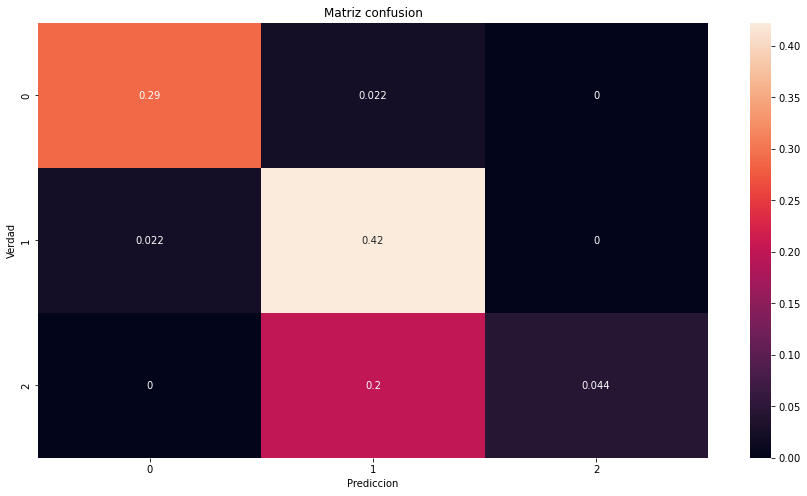

In [36]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [37]:
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()

X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [38]:
svc=SVC(probability=True).fit(X_train, y_train)


y_pred=svc.predict(X_test)  # predice etiqueta


y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve probabilidad

In [39]:
from sklearn.metrics import roc_curve as roc

from sklearn.metrics import roc_auc_score as auc

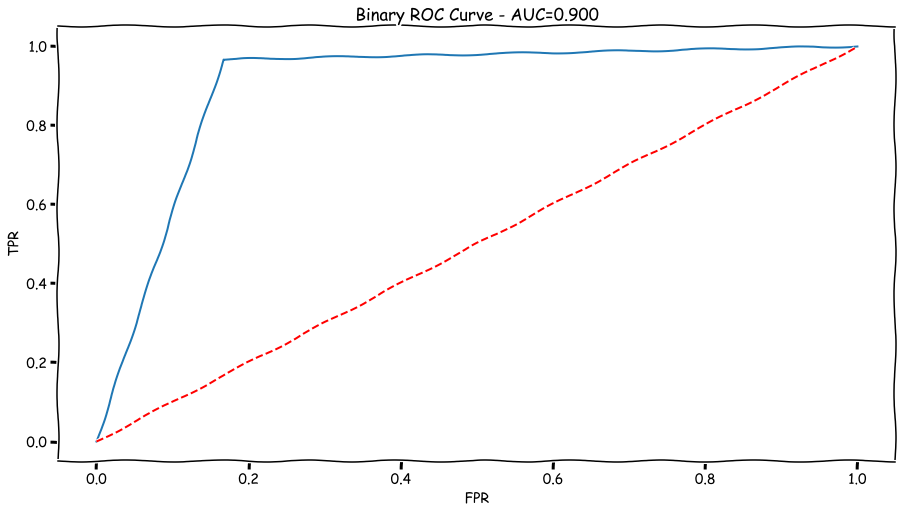

In [40]:
with plt.xkcd():    # mal pintao, y_pred
    
    plt.figure(figsize=(15, 8))
    
    fpr, tpr, umbrales = roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve - AUC={:.3f}'.format(a))
    plt.show();

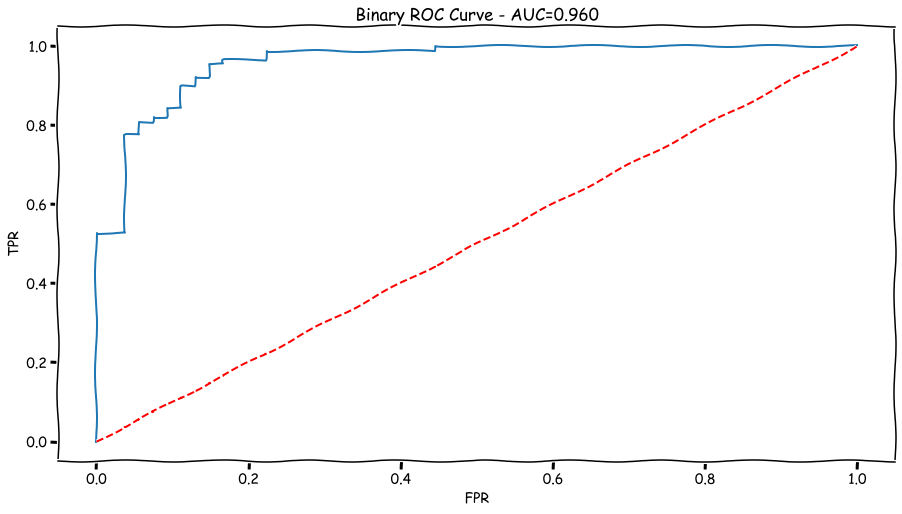

In [41]:
with plt.xkcd():    # bien pintao, y_prob
    
    plt.figure(figsize=(15, 8))
    
    fpr, tpr, umbrales = roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve - AUC={:.3f}'.format(a))
    plt.show();

In [ ]:
!pip install scikit-plot

In [43]:
import scikitplot as skplt

In [44]:
data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)

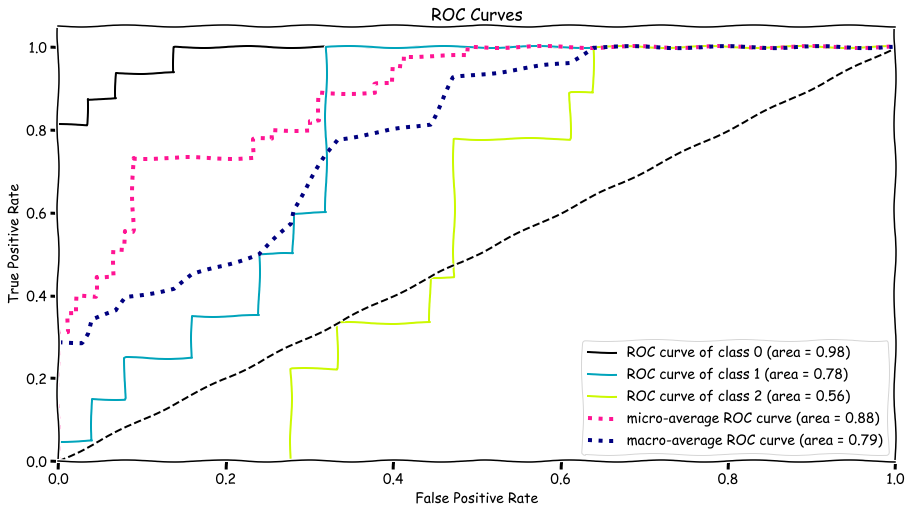

In [45]:
with plt.xkcd():

    skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));

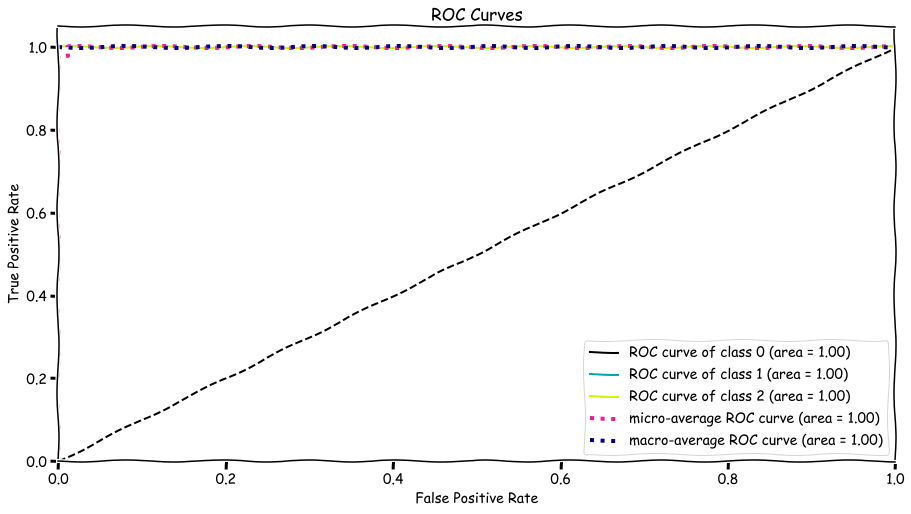

In [46]:
from sklearn.ensemble import RandomForestClassifier as RFC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

rf=RFC().fit(X_train, y_train)

y_pred=rf.predict(X_test)

y_prob=rf.predict_proba(X_test)


with plt.xkcd():

    skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));